# Variacion morfológica y geográfica entre diferentes poblaciones de  *Telmatobius marmoratus* en La Paz

El objetivo de este trabajo fue realizar una revisión de la especie de *Telmatobius marmoratus* de la Colección Boliviana de Fauna, analizar la variación geográfica entre poblaciones de *Telmatobius marmoratus* y en caso de que se encuentre variación se ve influenciada por el dimorfismo sexual de la especie estudiada. Se realizó una revisión de los individuos que se encuentran en la CBF en el que se midieron 17 variables en 43 individuos de la especie de *Telmatobius marmoratus* tanto hembras como machos.

## ambiente conda

Se utilizó este script debe ejecutarse con el entorno conda proyecto.yaml provisto en este repositorio de GitHub, el nombre del entorno es: proyecto. Por lo tanto, puede ejecutar: conda create --name proyecto --file proyecto.yaml en la terminal y luego activar proyecto. 

Por último, utilice ese entorno como kernel para ejecutar este cuaderno.

In [33]:
# Importa las biblotecas

import pandas as pd
from sklearn.datasets import load_iris

In [34]:
df = pd.read_csv('marmoratus.csv', delimiter=';', encoding='ISO-8859-1')
df.head() 

,N,zona,individuo,SEXO,SVL,HLEN,FEML,TIBL,FOOT,HUML,...,HNDL,LJW,HWID,IOD,IND,ENOS,SED,NMD,EYE,DISEÑO DORSAL
0,1,Sur,CBF-0457,H,"55,44","17,98","19,52","21,58","35,4","19,54",...,"13,06","18,64","21,62","5,94","3,24","3,6","7,38","4,4","4,6",PUNTOS
1,2,Sur,CBF-0468,H,"64,68","11,78","23,72","23,3","36,24","20,9",...,"13,58","20,36","24,86","7,3","3,5","4,1","7,76","4,12","6,4",PUNTOS
2,3,Sur,CBF-0469,H,"61,78","16,3","24,02","23,04","35,94","23,56",...,"14,44","20,3","23,3","6,2","3,22","3,62","8,04","4,76","5,4",PUNTOS
3,4,Sur,CBF-0470,M,"54,72","16,76","24,8","23,28","36,58","23,72",...,"13,1","18,68","20,84","6,36","3,38","3,24","6,54","4,22","5,5",PUNTOS
4,5,Sur,CBF-0477,M,"58,2","16,76","22,28","25,4","36,32","24,74",...,"13,52","20,4","20,6","6,58","3,38","3,34","7,2","4,62","5,8",PUNTOS


In [35]:
# cambia el separador decimal de ',' a '.' para que los números con decimales se reconozcan como tales
columns_to_convert = ['SVL', 'HLEN', 'FEML', 'TIBL', 'FOOT', 'HUML', 'RDL', 'HNDL', 'LJW', 'HWID', 'IOD', 'IND', 'ENOS', 'SED', 'NMD', 'EYE']
for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '.').astype(float)

In [36]:
print(df.head)

<bound method NDFrame.head of      N   zona  individuo SEXO    SVL   HLEN   FEML   TIBL   FOOT   HUML  ...  \
0    1    Sur   CBF-0457    H  55.44  17.98  19.52  21.58  35.40  19.54  ...   
1    2    Sur   CBF-0468    H  64.68  11.78  23.72  23.30  36.24  20.90  ...   
2    3    Sur   CBF-0469    H  61.78  16.30  24.02  23.04  35.94  23.56  ...   
3    4    Sur   CBF-0470    M  54.72  16.76  24.80  23.28  36.58  23.72  ...   
4    5    Sur   CBF-0477    M  58.20  16.76  22.28  25.40  36.32  24.74  ...   
5    6    Sur   CBF-0478    M  54.60  15.40  23.16  23.58  36.50  22.80  ...   
6    7    Sur   CBF-0486    H  64.12  18.92  29.26  26.92  26.10  24.62  ...   
7    8    Sur   CBF-0858    M  52.44  15.42  21.84  22.80  32.16  21.08  ...   
8    9    Sur  CBF-01009    M  54.46  15.70  20.74  22.64  33.54  24.40  ...   
9   10    Sur  CBF-01010    M  55.60  15.72  21.60  23.24  32.98  21.54  ...   
10  11    Sur  CBF-01011    M  56.70  17.66  25.02  26.62  34.44  20.26  ...   
11  12    

In [37]:
# Información básica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              47 non-null     int64  
 1   zona           47 non-null     object 
 2   individuo      47 non-null     object 
 3   SEXO           47 non-null     object 
 4   SVL            47 non-null     float64
 5   HLEN           47 non-null     float64
 6   FEML           47 non-null     float64
 7   TIBL           47 non-null     float64
 8   FOOT           47 non-null     float64
 9   HUML           47 non-null     float64
 10  RDL            47 non-null     float64
 11  HNDL           47 non-null     float64
 12  LJW            47 non-null     float64
 13  HWID           47 non-null     float64
 14  IOD            47 non-null     float64
 15  IND            47 non-null     float64
 16  ENOS           47 non-null     float64
 17  SED            47 non-null     float64
 18  NMD         

In [38]:
# Estadísticas descriptivas de las columnas numéricas
print(df.describe())

               N        SVL       HLEN       FEML       TIBL       FOOT  \
count  47.000000  47.000000  47.000000  47.000000  47.000000  47.000000   
mean   24.000000  55.257872  15.695319  23.634468  23.462340  35.835319   
std    13.711309   4.963989   1.902169   2.949850   2.453203   4.403623   
min     1.000000  45.800000  11.560000  17.460000  17.620000  26.100000   
25%    12.500000  51.700000  14.720000  21.570000  22.600000  33.090000   
50%    24.000000  54.720000  15.740000  23.360000  23.240000  35.940000   
75%    35.500000  58.110000  16.680000  25.380000  24.430000  37.010000   
max    47.000000  71.060000  21.020000  30.160000  31.560000  49.580000   

            HUML        RDL       HNDL       LJW       HWID        IOD  \
count  47.000000  47.000000  47.000000  47.00000  47.000000  47.000000   
mean   22.880426  12.040638  13.240426  19.32766  22.090213   6.896170   
std     2.120351   1.448760   1.611499   2.30905   2.502669   0.570898   
min    19.340000   9.060000 

In [44]:
# Descripción estadística de los datos morfológicos
df.describe()

,N,SVL,HLEN,FEML,TIBL,FOOT,HUML,RDL,HNDL,LJW,HWID,IOD,IND,ENOS,SED,NMD,EYE
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,24.000000,55.257872,15.695319,23.634468,23.462340,35.835319,22.880426,12.040638,13.240426,19.32766,22.090213,6.896170,3.507872,3.790213,7.700851,4.496170,5.062979
std,13.711309,4.963989,1.902169,2.949850,2.453203,4.403623,2.120351,1.448760,1.611499,2.30905,2.502669,0.570898,0.352148,0.548672,0.848702,0.666707,0.701204
min,1.000000,45.800000,11.560000,17.460000,17.620000,26.100000,19.340000,9.060000,10.420000,12.52000,18.040000,5.940000,3.020000,3.040000,6.160000,3.520000,4.160000
25%,12.500000,51.700000,14.720000,21.570000,22.600000,33.090000,21.270000,11.240000,12.540000,18.14000,20.610000,6.440000,3.250000,3.400000,7.210000,4.100000,4.560000
50%,24.000000,54.720000,15.740000,23.360000,23.240000,35.940000,22.480000,11.800000,13.060000,19.20000,22.240000,6.740000,3.480000,3.660000,7.660000,4.460000,4.800000
75%,35.500000,58.110000,16.680000,25.380000,24.430000,37.010000,24.390000,12.570000,13.900000,20.40000,23.340000,7.270000,3.670000,3.950000,8.090000,4.790000,5.460000
max,47.000000,71.060000,21.020000,30.160000,31.560000,49.580000,29.460000,17.540000,18.700000,27.60000,33.160000,8.640000,4.660000,5.940000,10.060000,7.240000,7.180000


In [39]:
# importa la libreria matplot

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import pandas as pd

# Crear el DataFrame con los datos proporcionados
data = {
    'zona': ['Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Sur', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Sur', 'Sur', 'Sur', 'Norte', 'Norte', 'Sur', 'Sur', 'Norte', 'Sur', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte'],
    'individuo': ['CBF-0457', 'CBF-0468', 'CBF-0469', 'CBF-0470', 'CBF-0477', 'CBF-0478', 'CBF-0486', 'CBF-0858', 'CBF-01009', 'CBF-01010', 'CBF-01011', 'CBF-01103', 'CBF-01104', 'CBF-02166', 'CBF-02742', 'CBF-02743', 'CBF-02744', 'CBF-03224', 'CBF-03228', 'CBF-04078', 'CBF-04079', 'CBF-04080', 'CBF-04077', 'CBF-04082', 'CBF-04084', 'CBF-06266', 'CBF-06270', 'CBF-06272', 'CBF-06291', 'CBF-06293', 'CBF-06294', 'CBF-06295', 'CBF-06296', 'CBF-06297', 'CBF-05866', 'CBF-05889', 'CBF-06309', 'CBF-06310', 'CBF-06311', 'CBF-06718', 'CBF-06878', 'CBF-06880', 'CBF-06881', 'CBF-06885', 'CBF-06889', 'CBF-06890', 'CBF-06891'],
    'SEXO': ['H', 'H', 'H', 'M', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'M', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M', 'H', 'H', 'H', 'H', 'H', 'M', 'H', 'M', 'H', 'M', 'M', 'H', 'H', 'M', 'H'],
    'SVL': [55.44, 64.68, 61.78, 54.72, 58.2, 54.6, 64.12, 52.44, 54.46, 55.6, 56.7, 51.38, 54.1, 52.82, 58.46, 58.72, 50.08, 59.82, 54.82, 49.58, 57.14, 54.52, 56.28, 50.8, 48.82, 52.02, 52.64, 54.92, 54.34, 64.36, 60.18, 49.66, 48.74, 48.76, 60.66, 53.06, 49.78, 56.76, 51.14, 45.8, 53.76, 50.46, 58.02, 55.26, 56.72, 71.06, 58.94],
    'HLEN': [17.98, 11.78, 16.3, 16.76, 16.76, 15.4, 18.92, 15.42, 15.7, 15.72, 17.66, 16.5, 17.56, 16.5, 17.86, 17.52, 14.82, 15.92, 14.86, 15.62, 16.14, 15.36, 15.74, 12.36, 13.5, 16.52, 15.1, 12.62, 16.6, 17.62, 17.3, 14.34, 12.34, 14.06, 17.7, 14.62, 13.06, 15.68, 11.56, 14.1, 14.1, 15.2, 16.44, 16.6, 16.42, 21.02, 16.02],
    'FEML': [19.52, 23.72, 24.02, 24.8, 22.28, 23.16, 29.26, 21.84, 20.74, 21.6, 25.02, 22.08, 25.32, 21.54, 21.18, 23.2, 23.08, 25.42, 22.18, 25.34, 26.74, 26.06, 24.6, 27.8, 23.3, 27.3, 25.98, 23.42, 23.36, 29.16, 29.48, 20.04, 17.46, 18.54, 25.5, 24.58, 23.6, 25.3, 25.62, 23.22, 21.18, 19.28, 20.62, 21.54, 19.52, 30.16, 22.16],
    'TIBL': [21.58, 23.3, 23.04, 23.28, 25.4, 23.58, 26.92, 22.8, 22.64, 23.24, 26.62, 23.82, 25.06, 23.14, 23.82, 23.2, 23.14, 24.26, 21.22, 22.84, 25.7, 23.73, 23.86, 25.64, 21.92, 24.6, 22.76, 23.34, 23.3, 27.42, 27.6, 20.08, 17.62, 18.72, 27.08, 24.22, 20.76, 22.04, 24.62, 22.64, 18.58, 21.26, 22.24, 22.56, 23.06, 31.56, 22.92],
    'FOOT': [35.4, 36.24, 35.94, 36.58, 36.32, 36.5, 26.1, 32.16, 33.54, 32.98, 34.44, 33.2, 39.34, 38.24, 40.5, 39.3, 34.44, 36.76, 34.62, 30.68, 36.42, 37.36, 34.8, 41.22, 32.08, 31.94, 35.98, 35.3, 37.72, 46.4, 43.32, 30.8, 29.02, 29.8, 45.4, 36.94, 32.28, 36.6, 32.16, 34.84, 31.06, 36.16, 34.72, 37.08, 36.4, 49.58, 35.6],
    'HUML': [19.54, 20.9, 23.56, 23.72, 24.74, 22.8, 24.62, 21.08, 24.4, 21.54, 20.26, 19.72, 22.46, 22.3, 24.34, 28.04, 24.8, 22.24, 21.44, 20.76, 22.68, 21.12, 22.48, 24.38, 22.06, 25.54, 23.22, 19.34, 21.32, 21.82, 22.18, 22.74, 21.18, 22.22, 21.06, 24.72, 21.34, 24.18, 24.96, 22.5, 24.68, 20.74, 23.34, 25.76, 21.22, 29.46, 25.88],
    'RDL': [11.02, 11.1, 12.14, 11.48, 13.02, 11.44, 14.88, 10.14, 11.42, 11.24, 13.8, 11.02, 12.58, 11.82, 12.32, 11.39, 11.46, 12.44, 12.02, 11.24, 12.88, 12.16, 12.56, 12.78, 10.52, 12.62, 12.46, 11.62, 11.38, 13.3, 14.24, 9.6, 10.08, 9.06, 13.98, 11.2, 11.02, 12.16, 11.6, 11.8, 11.54, 11.18, 12.42, 12.34, 11.34, 17.54, 14.56],
    'HNDL': [13.06, 13.58, 14.44, 13.1, 13.52, 13.06, 14.92, 11.84, 10.42, 11.22, 13.48, 13.14, 14.44, 13.24, 14.32, 14.72, 12.72, 13.44, 12.78, 12.72, 12.68, 12.56, 12.54, 12.64, 12.62, 12.54, 12.32, 18.7, 14.28, 17.04, 15.64, 13.08, 11.16, 10.56, 15.22, 12.38, 11.2, 12.68, 14.22, 11.68, 12.08, 11.42, 13.04, 13.34, 13.22, 16.66, 12.64],
    'LJW': [18.64, 20.36, 20.3, 18.68, 20.4, 19.02, 22.78, 19.2, 21.6, 20.54, 21.1, 18.42, 18.5, 19.72, 21.26, 21.78, 17.88, 18.12, 17.72, 12.52, 20.36, 17.66, 20.4, 21.18, 18.34, 19.74, 18.1, 19.16, 18.16, 22.76, 20.06, 16.68, 15.12, 15.42, 21.18, 17.54, 16.74, 19.66, 19.4, 17.92, 18.26, 18.84, 19.48, 20.12, 18.58, 27.6, 21.4],
    'HWID': [21.62, 24.86, 23.3, 20.84, 20.6, 21.28, 25.46, 22.32, 23.96, 23.24, 22.64, 19.02, 20.32, 21.42, 24.1, 23.56, 20.04, 23.2, 19.64, 19.26, 24.52, 22.24, 22.78, 24.26, 21.1, 22.24, 18.68, 21.46, 20.74, 24.32, 24.12, 18.04, 18.54, 18.46, 22.24, 20.62, 20.4, 22.26, 21.56, 19.78, 21.62, 21.42, 22.52, 22.58, 23.38, 33.16, 24.52],
    'IOD': [5.94, 7.3, 6.2, 6.36, 6.58, 6.48, 7.52, 6.3, 6.6, 6.62, 7.62, 6.6, 7.16, 6.74, 7.22, 7.36, 6.74, 7.24, 6.64, 6.22, 6.3, 6.8, 7.22, 7.46, 7.36, 6.64, 6.44, 7.52, 6.3, 7.64, 7.42, 6.28, 6.18, 6.42, 8.64, 8.22, 6.74, 6.9, 7.1, 6.22, 7.24, 6.44, 6.7, 7.08, 6.92, 7.66, 6.84],
    'IND': [3.24, 3.5, 3.22, 3.38, 3.38, 3.26, 4.3, 3.02, 3.04, 3.08, 3.54, 3.68, 3.32, 3.52, 3.74, 3.68, 3.66, 4.18, 3.55, 3.02, 3.1, 3.48, 3.46, 3.52, 3.62, 3.22, 3.64, 3.28, 3.42, 3.62, 3.84, 3.08, 3.3, 3.32, 4.66, 3.9, 3.22, 3.24, 3.36, 3.42, 3.64, 3.1, 3.76, 3.6, 3.68, 4.24, 3.84],
    'ENOS': [3.6, 4.1, 3.62, 3.24, 3.34, 3.38, 4.32, 3.12, 3.98, 3.36, 3.92, 3.58, 4.54, 3.38, 4.56, 3.92, 3.76, 3.86, 4.42, 3.04, 3.16, 3.46, 3.36, 4.34, 3.28, 3.78, 4.36, 3.6, 3.14, 4.64, 3.64, 3.48, 3.42, 3.74, 4.82, 3.78, 3.62, 3.56, 3.86, 3.76, 3.08, 3.66, 3.82, 3.88, 3.56, 5.94, 4.36],
    'SED': [7.38, 7.76, 8.04, 6.54, 7.2, 6.38, 7.24, 7.1, 7.46, 7.82, 9.54, 8.12, 8.86, 6.18, 8.94, 8.74, 8.1, 7.78, 7.54, 7.1, 7.66, 7.28, 7.64, 7.68, 6.64, 7.36, 7.56, 8.04, 7.54, 8.64, 8.46, 6.64, 6.62, 7.68, 8.9, 7.92, 6.16, 9.02, 8.08, 6.92, 7.06, 7.76, 7.74, 7.4, 7.22, 10.6, 8.44],
    'NMD': [4.4, 4.12, 4.76, 4.22, 4.62, 4.76, 4.96, 4.36, 4.72, 4.74, 5.42, 4.74, 4.82, 4.28, 4.7, 4.46, 5.18, 4.9, 3.58, 4.44, 4.36, 4.22, 4.42, 4.88, 3.56, 3.92, 4.28, 3.72, 5.38, 5.68, 4.48, 3.64, 3.52, 7.24, 4.82, 4.4, 3.72, 3.78, 4.96, 3.62, 4.6, 4.6, 4.42, 4.8, 3.6, 4.94, 4.66],
    'EYE': [4.6, 6.4, 5.4, 5.5, 5.8, 5.3, 6.46, 5.1, 5.74, 7.18, 5.42, 4.6, 4.3, 4.48, 5.54, 5.5, 4.36, 4.88, 4.64, 4.34, 4.64, 4.28, 4.74, 5.36, 4.36, 4.68, 5.24, 4.52, 5.38, 5.76, 4.78, 4.62, 4.42, 4.28, 6.6, 5.32, 4.16, 4.92, 4.7, 4.34, 4.8, 4.74, 4.72, 4.84, 4.38, 6.48, 5.9]}

### Análisis de Varianza (ANOVA)
Para comparar las medias de las características morfológicas entre diferentes zonas (Norte y Sur).

In [41]:
from scipy import stats

# Realizar ANOVA para cada característica morfológica
anova_results = {}
columns_to_analyze = ['SVL', 'HLEN', 'FEML', 'TIBL', 'FOOT', 'HUML', 'RDL', 'HNDL', 'LJW', 'HWID', 'IOD', 'IND', 'ENOS', 'SED', 'NMD', 'EYE']

for column in columns_to_analyze:
    anova_results[column] = stats.f_oneway(
        df[df['zona'] == 'Norte'][column],
        df[df['zona'] == 'Sur'][column]
    )

# Mostrar los resultados de ANOVA
for key, value in anova_results.items():
    print(f'{key}: F={value.statistic}, p={value.pvalue}')

SVL: F=3.0757175118848927, p=0.08627854312790541
HLEN: F=1.1086213269876133, p=0.2980029071696673
FEML: F=0.5654216419285052, p=0.45599915292319093
TIBL: F=1.4593490589500566, p=0.2333442169843487
FOOT: F=7.66618451597952, p=0.008142706265060628
HUML: F=5.079969087739335, p=0.02912118071512539
RDL: F=4.498826123697965, p=0.03946139591663677
HNDL: F=8.260707456152563, p=0.0061646783517450175
LJW: F=2.095416255514409, p=0.15467282205279462
HWID: F=1.962138400684669, p=0.16814313335392436
IOD: F=8.196864477771523, p=0.006350235951988982
IND: F=13.8090633571485, p=0.0005573089862884358
ENOS: F=7.690127275294107, p=0.008051204198536053
SED: F=7.852131253495747, p=0.007460080058018089
NMD: F=0.06391450749004131, p=0.8015638978449638
EYE: F=0.13836373270916447, p=0.7116590904919968


In [45]:
anova_results = stats.f_oneway(df[df['zona'] == 'Norte']['SVL'], df[df['zona'] == 'Sur']['SVL'])
print(f"F-Statistic: {anova_results.statistic}, p-Value: {anova_results.pvalue}")

F-Statistic: 3.0757175118848927, p-Value: 0.08627854312790541


In [46]:
anova_results = stats.f_oneway(df[df['zona'] == 'Norte']['RDL'], df[df['zona'] == 'Sur']['RDL'])
print(f"F-Statistic: {anova_results.statistic}, p-Value: {anova_results.pvalue}")

F-Statistic: 4.498826123697965, p-Value: 0.03946139591663677


Si el p-valor es 0.03 para RDL, esto sugiere que hay una diferencia significativa en la longitud del cuerpo entre las zonas Norte y Sur.

### Análisis de Componentes Principales (PCA)
Para reducir la dimensionalidad de los datos y visualizar la variación principal.

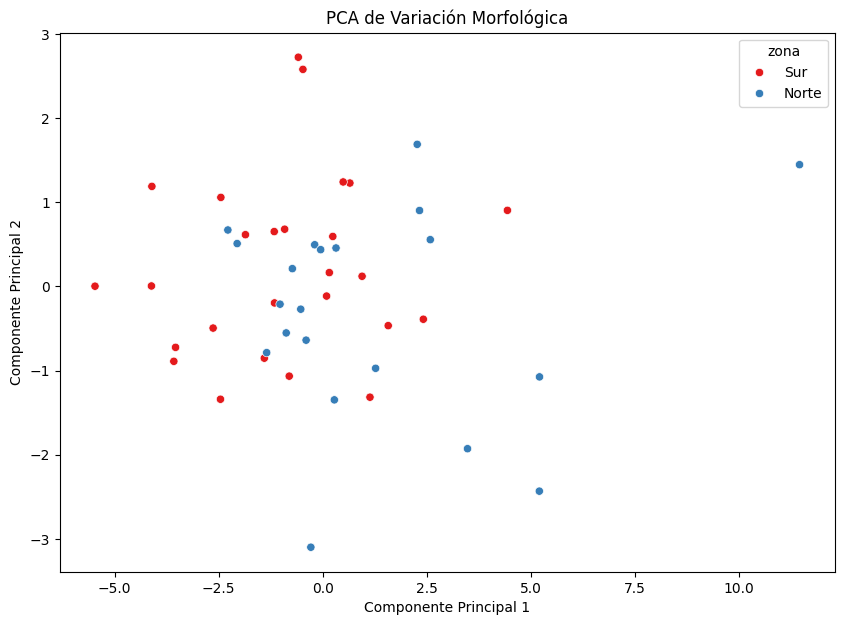

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas morfológicas
morphological_data = df[columns_to_analyze]

# Normalizar los datos
morphological_data = (morphological_data - morphological_data.mean()) / morphological_data.std()

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(morphological_data)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['zona'] = df['zona']

# Visualizar los resultados
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='zona', data=pca_df, palette='Set1')
plt.title('PCA de Variación Morfológica')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### Análisis de Correlación
Para examinar las relaciones entre diferentes características morfológicas.

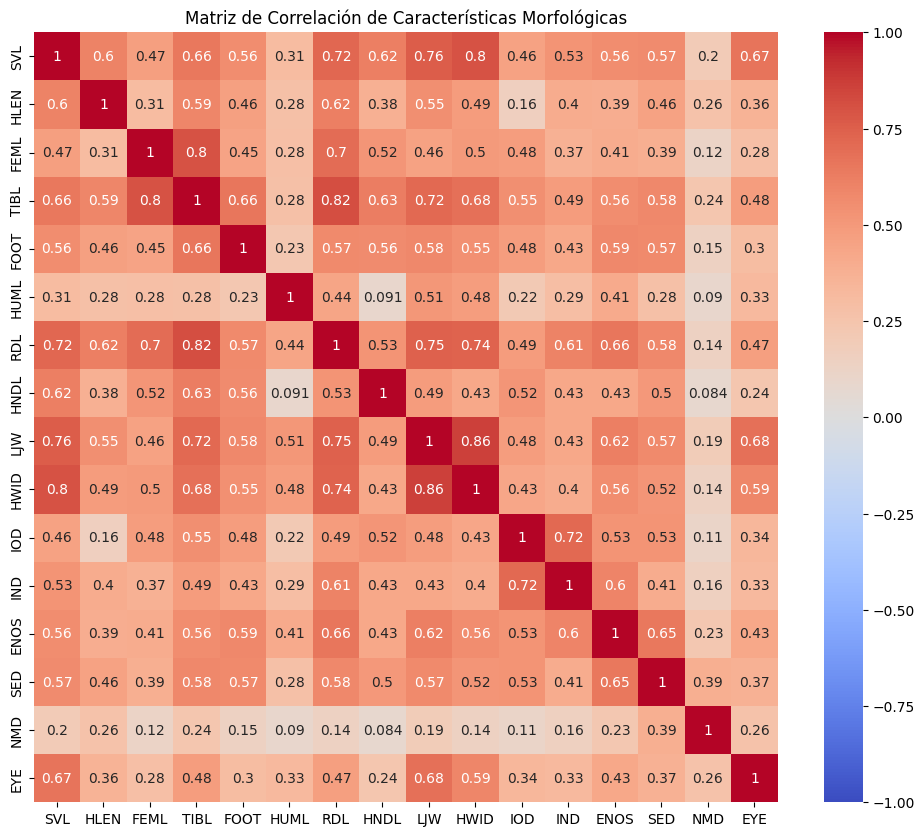

In [43]:
# Matriz de correlación
correlation_matrix = df[columns_to_analyze].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Características Morfológicas')
plt.show()

In [48]:
correlation_matrix = df[columns_to_analyze].corr()
print(correlation_matrix)

           SVL      HLEN      FEML      TIBL      FOOT      HUML       RDL  \
SVL   1.000000  0.604229  0.469735  0.655125  0.561979  0.309941  0.719454   
HLEN  0.604229  1.000000  0.308727  0.586355  0.462846  0.278133  0.624541   
FEML  0.469735  0.308727  1.000000  0.802853  0.452877  0.281472  0.695614   
TIBL  0.655125  0.586355  0.802853  1.000000  0.658241  0.280098  0.815979   
FOOT  0.561979  0.462846  0.452877  0.658241  1.000000  0.230679  0.574635   
HUML  0.309941  0.278133  0.281472  0.280098  0.230679  1.000000  0.443037   
RDL   0.719454  0.624541  0.695614  0.815979  0.574635  0.443037  1.000000   
HNDL  0.619596  0.376572  0.518027  0.629960  0.564535  0.091294  0.529108   
LJW   0.763216  0.547284  0.455434  0.716522  0.579839  0.513979  0.746746   
HWID  0.804025  0.491172  0.497674  0.684899  0.545270  0.476576  0.738543   
IOD   0.460031  0.160757  0.478328  0.549194  0.479184  0.218646  0.491872   
IND   0.530864  0.402174  0.374732  0.490232  0.427607  0.290115

si SVL y HLEN tienen un coeficiente de correlación de 0.85, esto indica una fuerte correlación positiva, sugiriendo que a medida que SVL aumenta, HLEN también tiende a aumentar.